In [62]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys # provide keys in the keyboard
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

import random

from PIL import Image

In [20]:
def get_proxy():
    options = Options()
    options.headless = True
    cap = DesiredCapabilities().FIREFOX
    cap["marionette"] = True # fixed the version conflicts between firefox, selenium  
    driver = webdriver.Firefox(options = options,
                               capabilities=cap,
                               executable_path='./geckodriver')
    driver.get('https://free-proxy-list.net/#')
    proxy = []
    for i in range(1,20):
        IP = driver.find_element_by_xpath(f"//tbody[1]/tr[{i}]/td[1]").text
        port = driver.find_element_by_xpath(f"//tbody[1]/tr[{i}]/td[2]").text
        proxy.append(IP + ':' + port)
    driver.close()
    return proxy

In [25]:
proxy_list = get_proxy()
random.choice(proxy_list)

'162.243.108.141:3128'

In [131]:
def Start_FF():
    options = Options()
    options.headless = True # headless mode
    cap = DesiredCapabilities().FIREFOX
    cap["marionette"] = True # fixed the version conflicts between firefox, selenium
    return webdriver.Firefox(options = options,
                             proxy = random.choice(proxy_list),
                             capabilities=cap,
                             executable_path='./geckodriver')



In [132]:
driver = Start_FF() # create firefox webdriver
driver.implicitly_wait(10) # wait for 10 seconds for all dynamic elements
# explicit wait: wait for the next part to become viewable 
#WebDriverWait(driver, 10).until(EC.presence_of_element_located((
#    By.XPATH, "//input[@name='dto.vehicleDetailsDTO.year']")))
Allianz_get_quote = "https://www.einsure.com.au/DSP/personal/web/motor/new?fi=ALLIANZ" 
driver.get(Allianz_get_quote)  

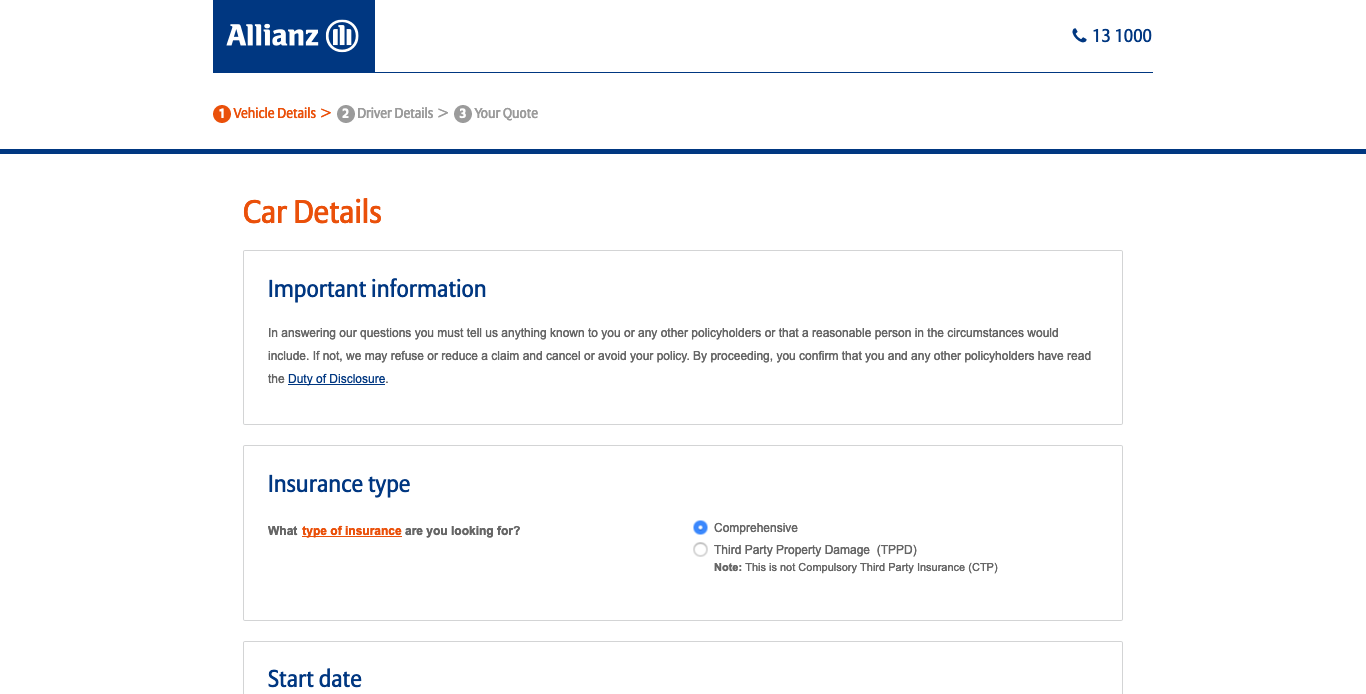

In [133]:
# choosing insurance type
def ins_type(driver, index = 0): # iterable
    insurType_ops = driver.find_elements_by_xpath("//input[@name='dto.insuranceType']") 
    insurType_ops[index].click() 

ins_type(driver, index = 0)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

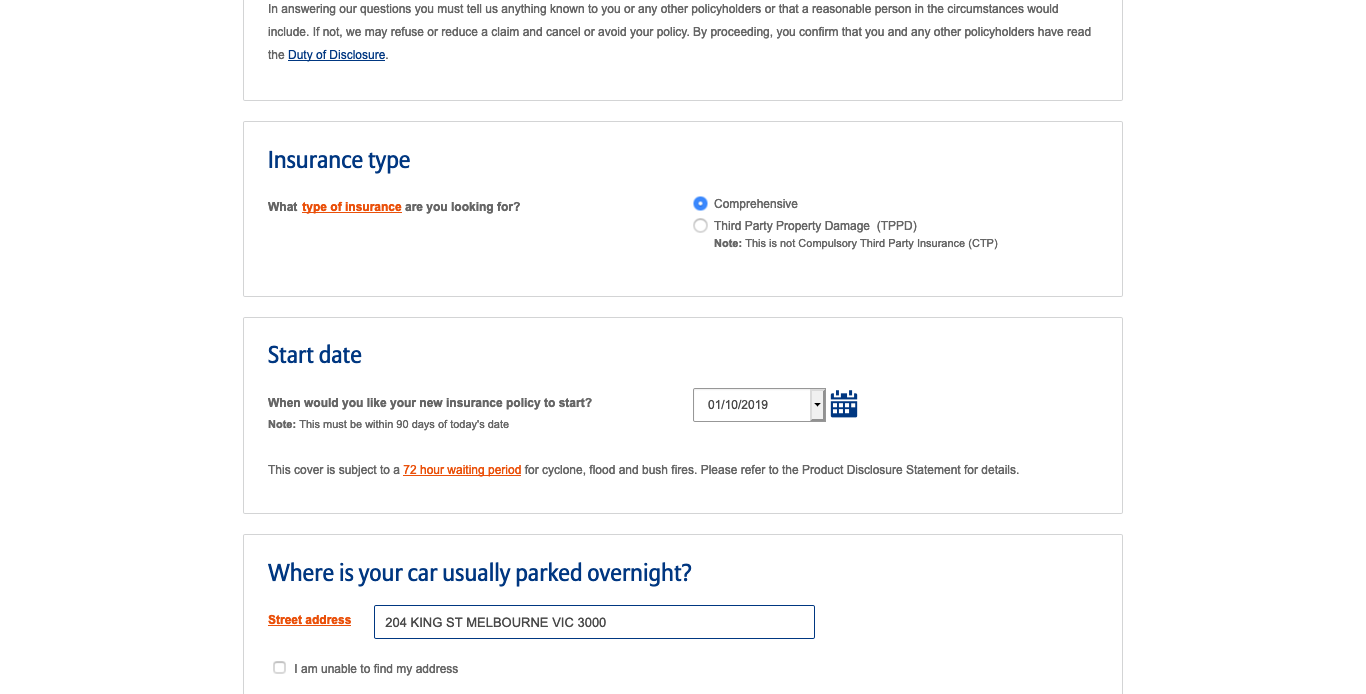

In [134]:
# entering address
def addr(driver,Postcode = "3000"):  # must enter
    address = driver.find_element_by_xpath("//input[@name='dto.riskAddress.displayString']") 
    address.clear()
    address.send_keys(Postcode)
    address_ops = driver.find_elements_by_class_name("ui-menu-item")
    address_ops[1].click()
    
addr(driver,Postcode = "3000")
driver.save_screenshot('quote.png')
Image.open('quote.png')  

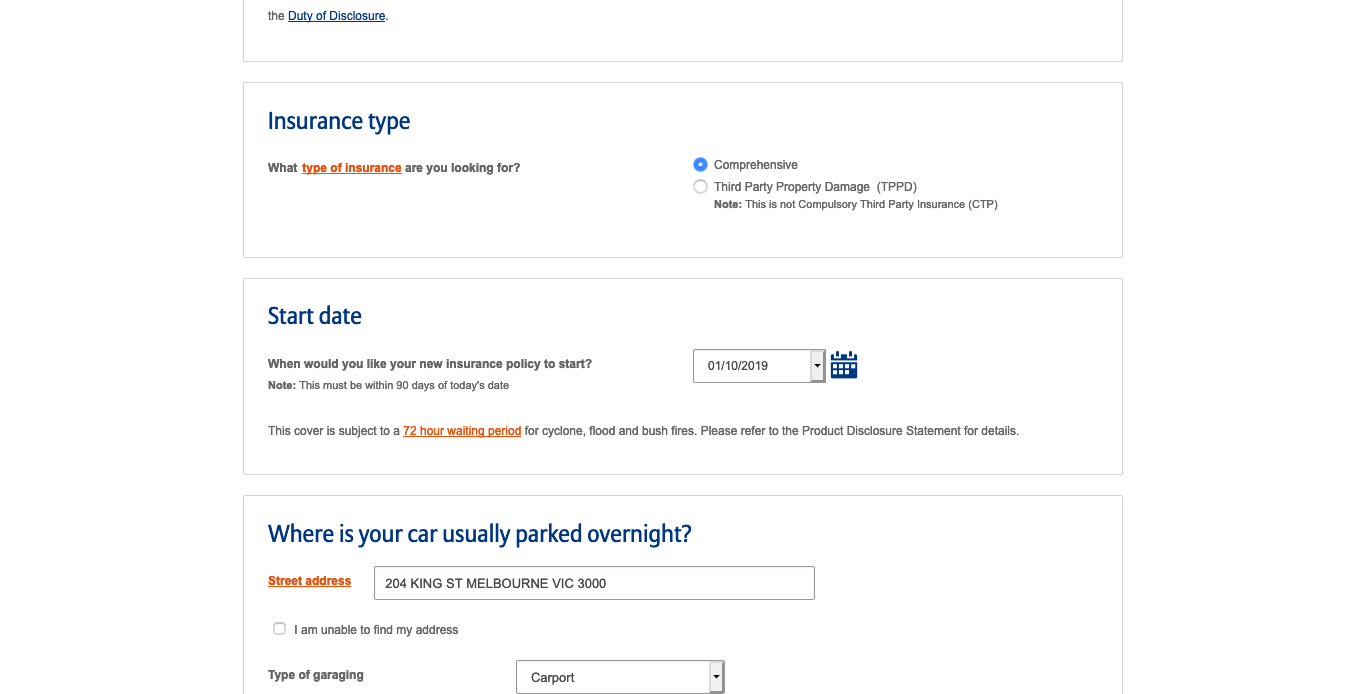

In [135]:
# selecting type of garage
def garage(driver,index=1): # iterable
    garage = driver.find_element_by_xpath("//select[@name='dto.garageType']")
    gar_options = Select(garage)
    gar_options.select_by_index(index) 

garage(driver,index=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

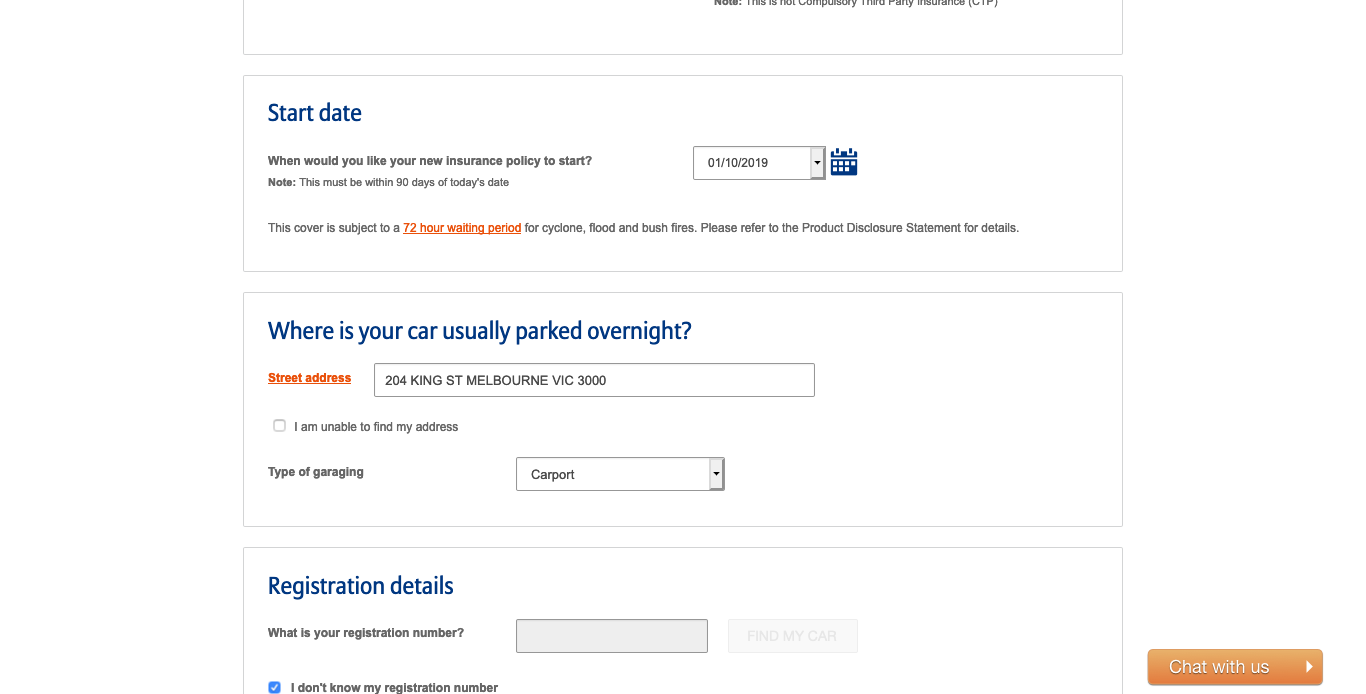

In [136]:
# car details
def mamual_enter(driver): # manually enter caar details 
    driver.find_element_by_xpath("//input[@name='manualRegistration']").click()
    
mamual_enter(driver)    
driver.save_screenshot('quote.png')
Image.open('quote.png')  

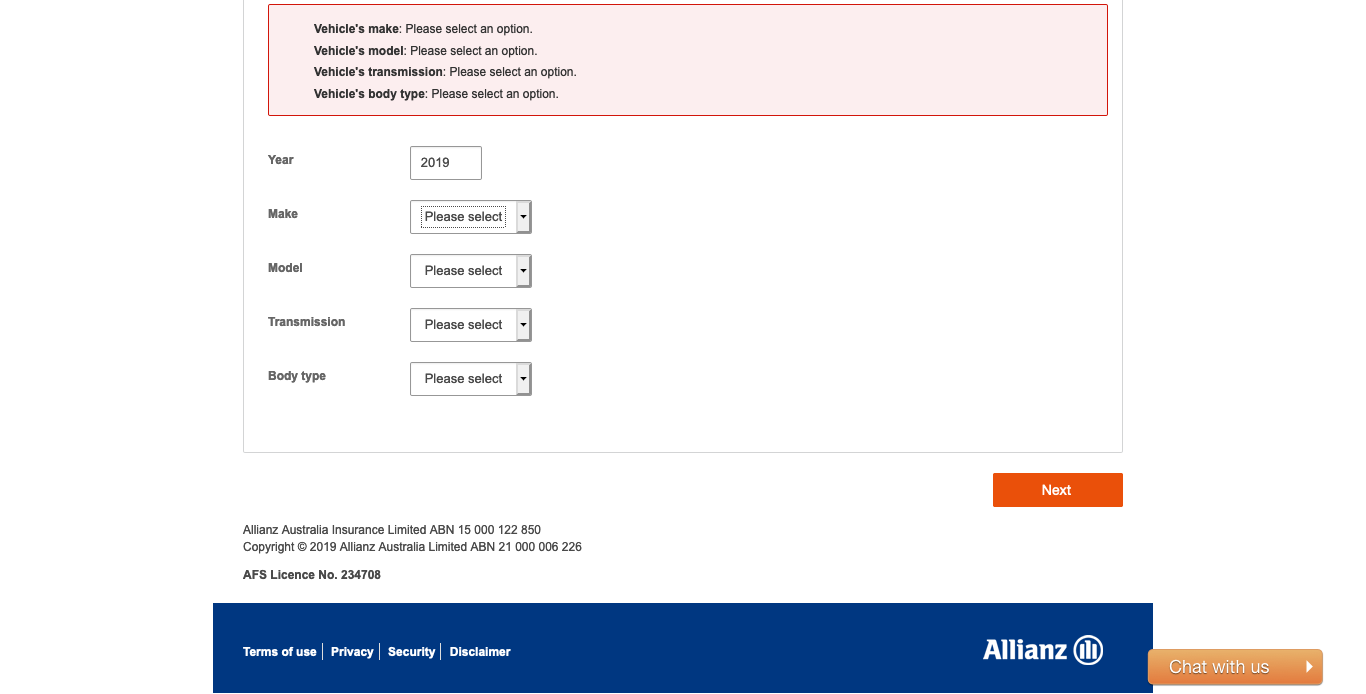

In [137]:
def car_year(driver, year = "2019"): # must enter
    car_year = driver.find_element_by_xpath("//input[@name='dto.vehicleDetailsDTO.year']")
    car_year.clear()
    car_year.send_keys(year,Keys.RETURN) 
    
car_year(driver,year="2019")
driver.save_screenshot('quote.png')
Image.open('quote.png')  

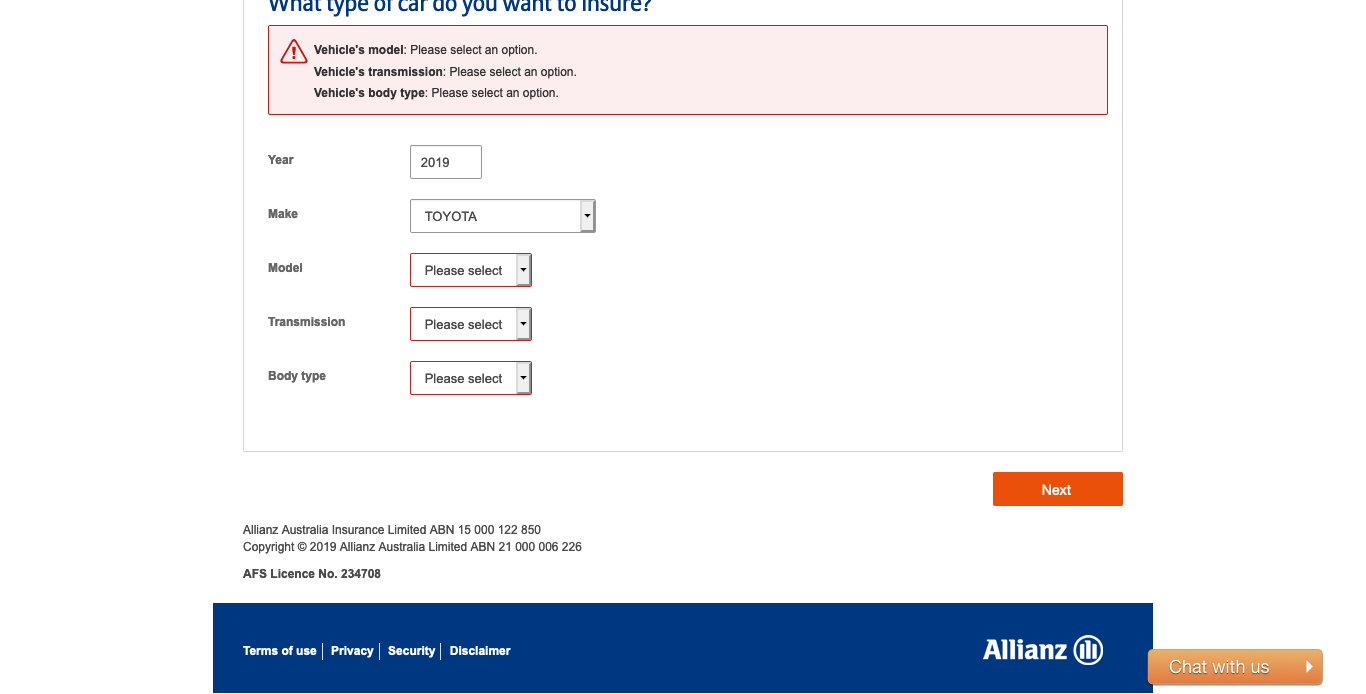

In [138]:
def car_make(driver,index=1): # iterable
    make = driver.find_element_by_xpath("//select[@name='dto.vehicleDetailsDTO.make']")
    make_options = Select(make)
    make_options.select_by_index(index) 
    
car_make(driver,index=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

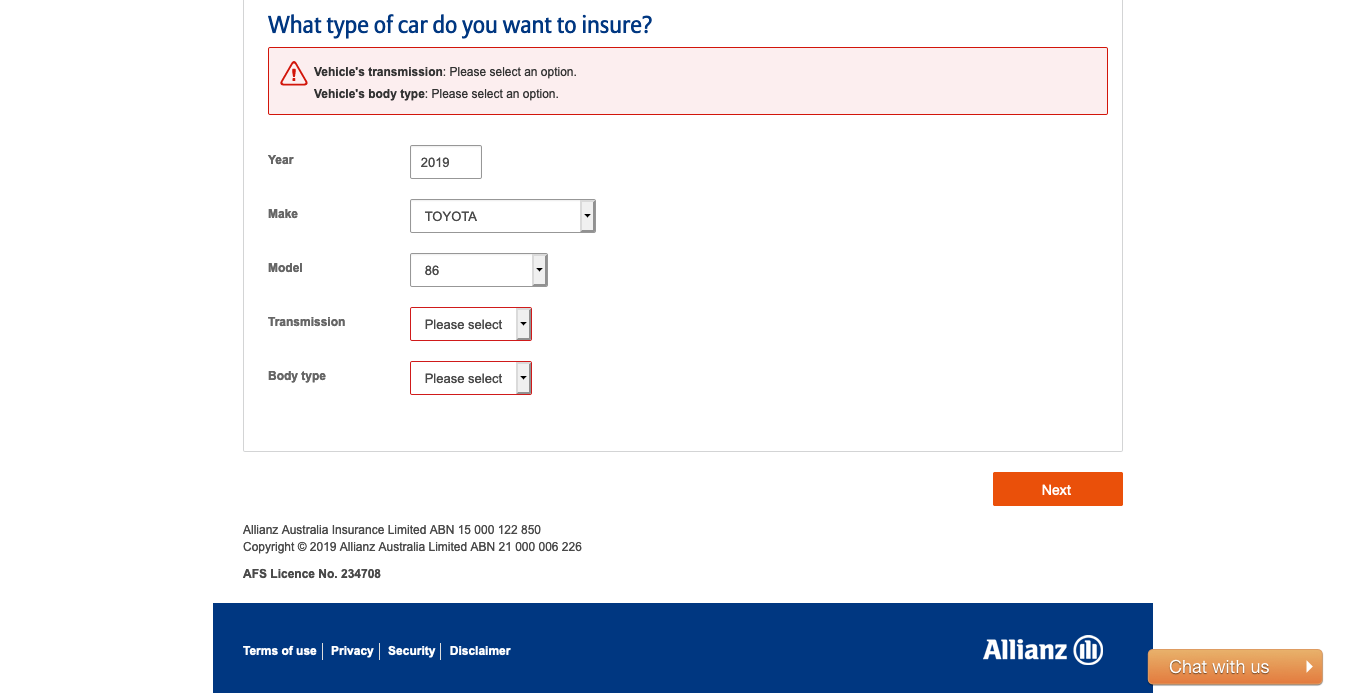

In [139]:
def car_model(driver,index=1): # iterable
    model = driver.find_element_by_xpath("//select[@name='dto.vehicleDetailsDTO.model']")
    model_options = Select(model)
    model_options.select_by_index(index) 
    
car_model(driver)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

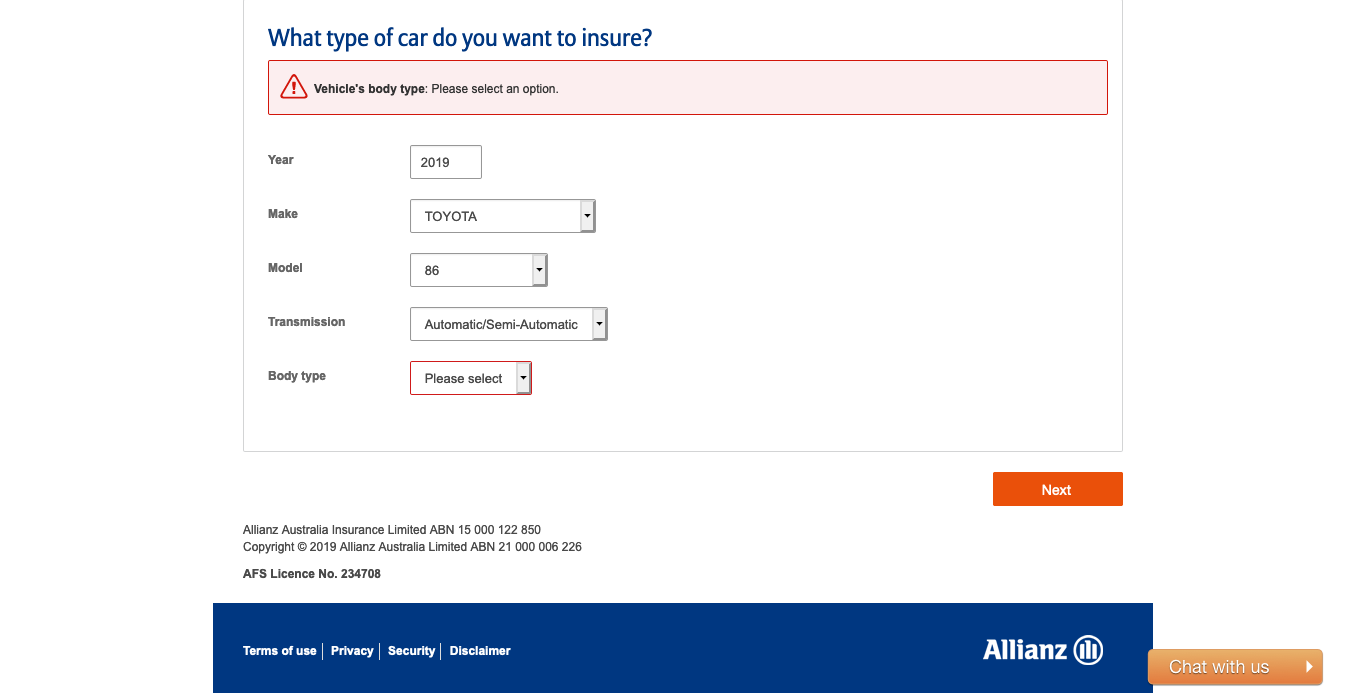

In [140]:
def car_transmission(driver, index=1): # iterable
    transmission = driver.find_element_by_xpath("//select[@name='dto.vehicleDetailsDTO.transmission']")
    transmission_options = Select(transmission)
    transmission_options.select_by_index(index) 
    
car_transmission(driver, index=1)    
driver.save_screenshot('quote.png')
Image.open('quote.png')  


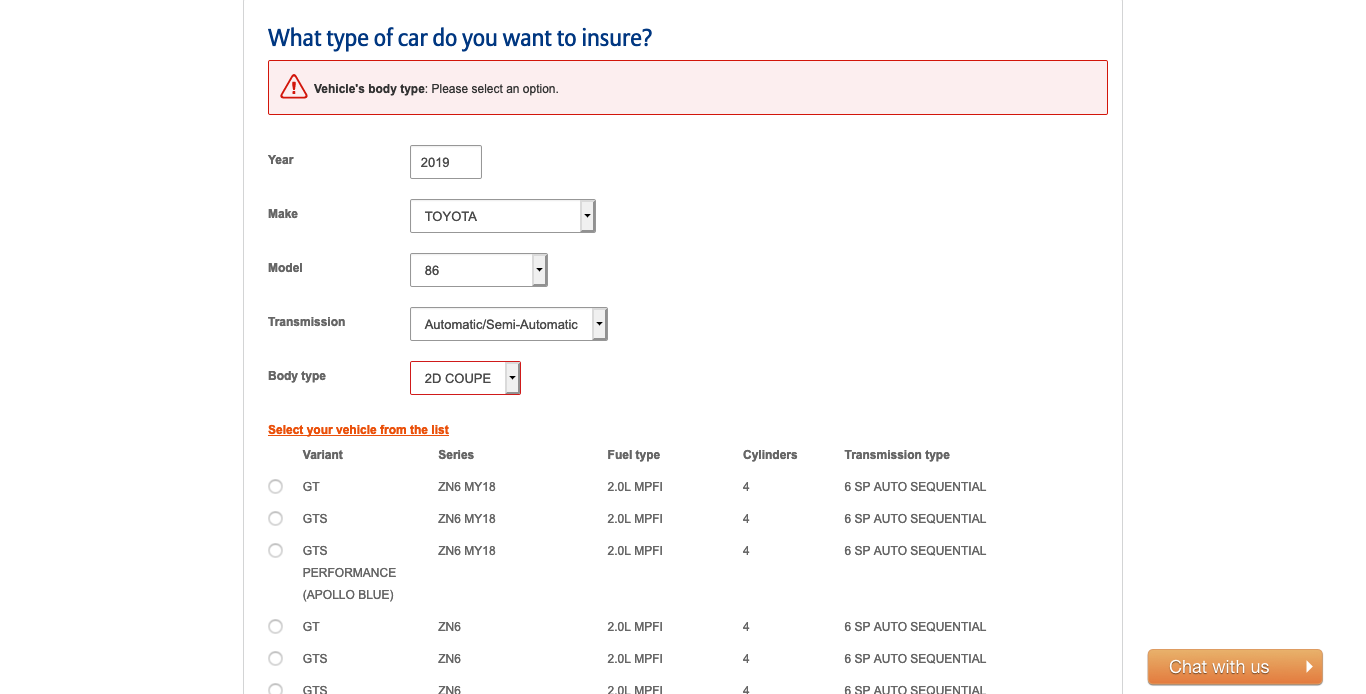

In [141]:
def car_body(driver,index=0): # iterable, already has input
    body = driver.find_element_by_xpath("//select[@name='dto.vehicleDetailsDTO.body']")
    body_options = Select(body)
    body_options.select_by_index(index)
    
car_body(driver,index=0)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

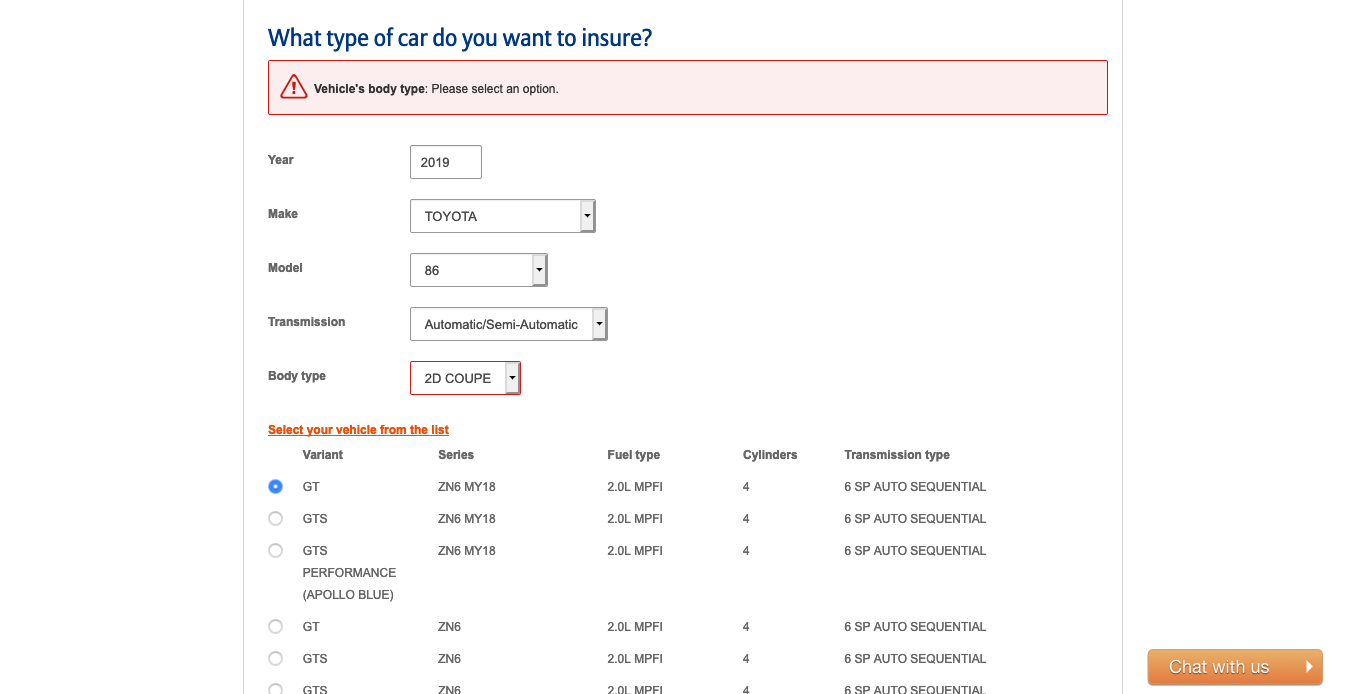

In [142]:
def car_options(driver,index=0): # iterable
    vehicle_options = driver.find_elements_by_xpath("//input[@name='vehicleVariants']") 
    vehicle_options[0].click() 
    
car_options(driver,index=0)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

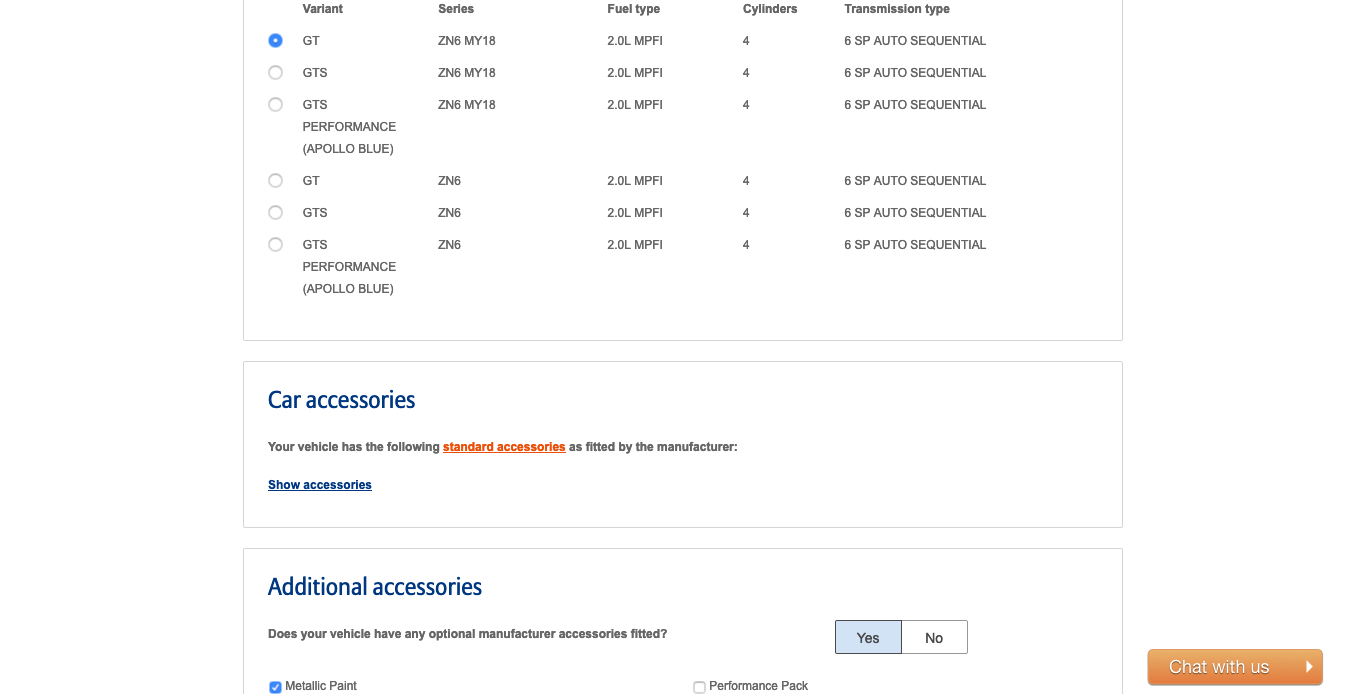

In [143]:
def op_accessories(driver,response="n",num_acc=None): # number of accessories <=3
    if response == "n":
        driver.find_element_by_id("labelHasOptionalAccessoriesNo").click() #click the label not the input
    elif response == "y":
        driver.find_element_by_id("labelHasOptionalAccessoriesYes").click()
        acc_options = driver.find_elements_by_xpath("//input[@name='dto.selectedOptionalAccessories']")
        acc_options[num_acc-1].click()

op_accessories(driver,response="y",num_acc=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

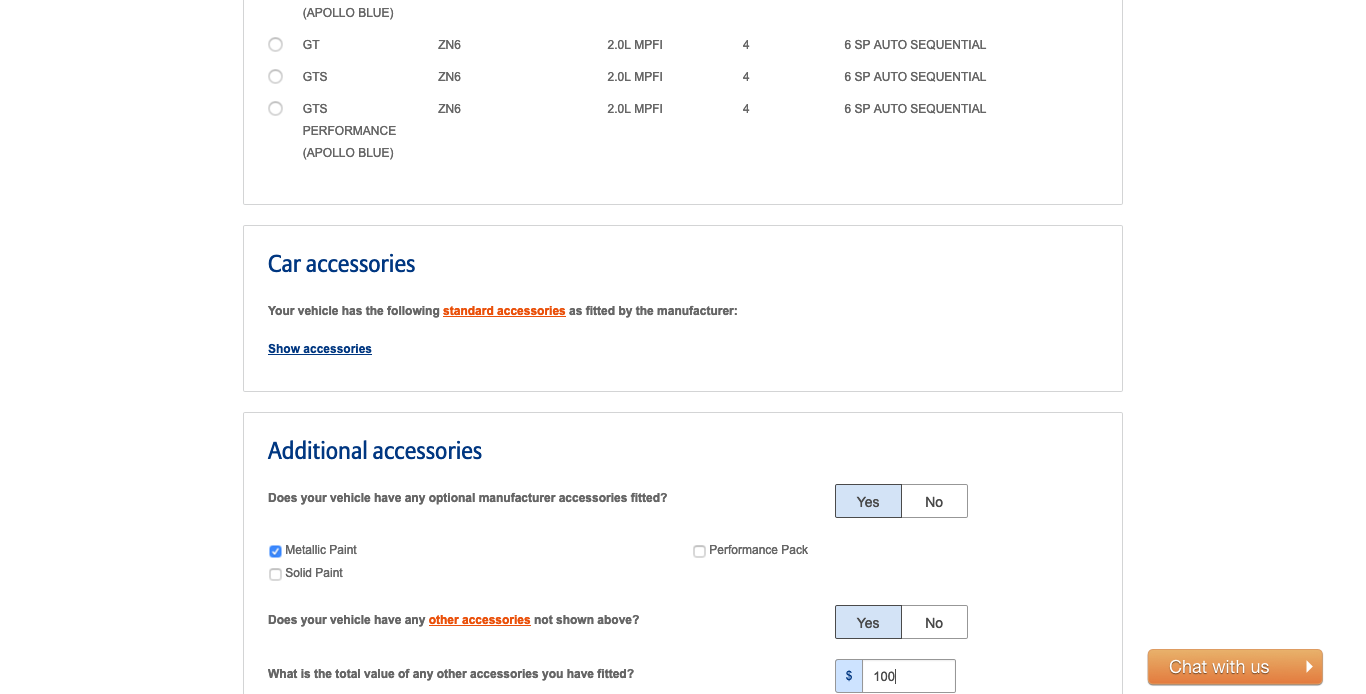

In [144]:
def oth_accessories(driver,response="n",val_acc=None):
    if response == "n":
        driver.find_element_by_id("labelHasOtherAccessoriesNo").click()
    elif response == "y":
        driver.find_element_by_id("labelHasOtherAccessoriesYes").click()
        val = driver.find_element_by_id("otherAccessoriesAmt")
        val.clear()
        val.send_keys(val_acc)

oth_accessories(driver,response="y",val_acc=100)
driver.save_screenshot('quote.png')
Image.open('quote.png')  
    

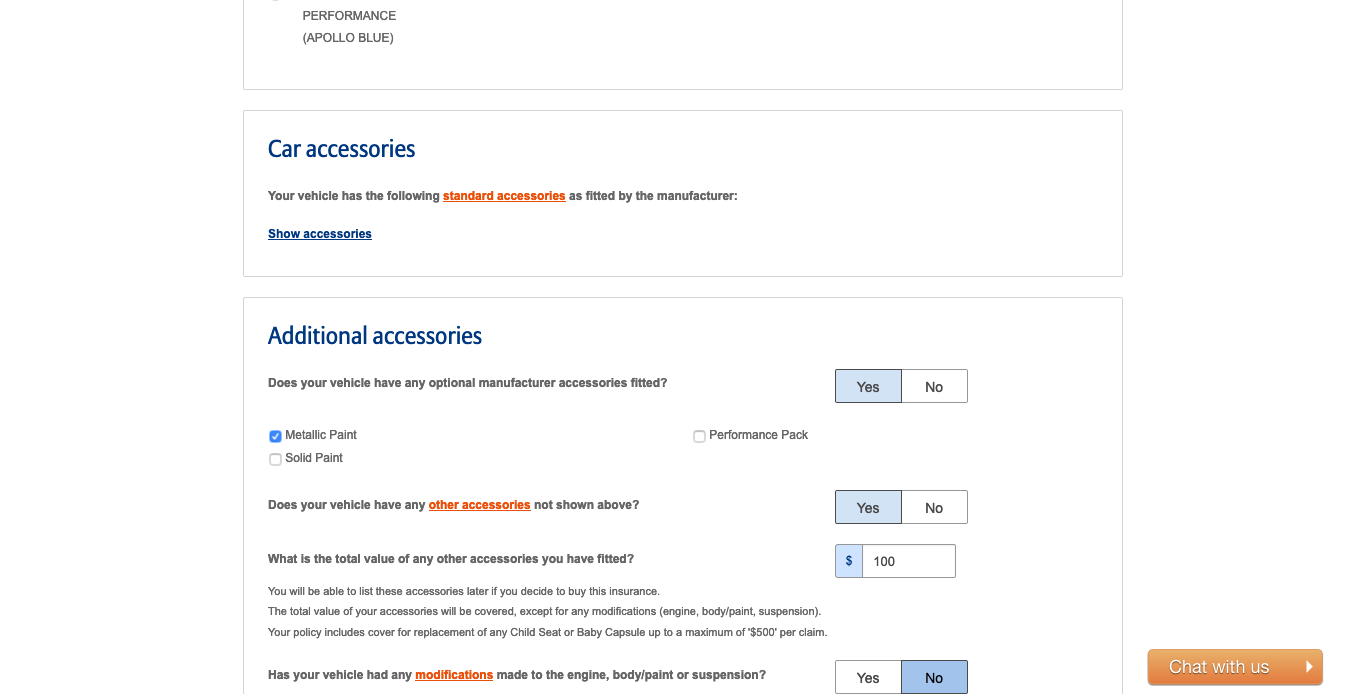

In [145]:
def mod(driver,response="n"):
    if response == "n":
        driver.find_element_by_id("labelVehicleModifiedNo").click()
    elif response == "y":
        driver.find_element_by_id("labelVehicleModifiedYes").click()
        
mod(driver,response="n") # modified vehicle can't have online quote
driver.save_screenshot('quote.png')
Image.open('quote.png')       

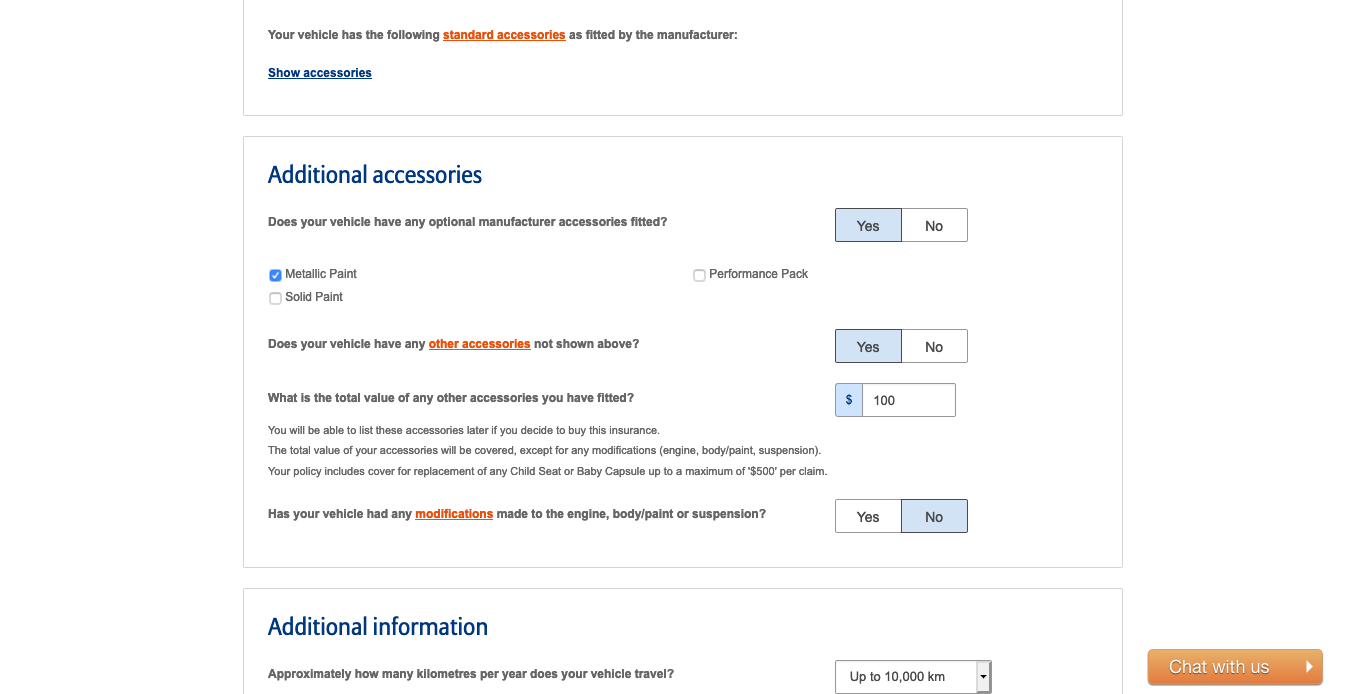

In [146]:
def km_travelled(driver,index=1): # iterable
    km_travelled = driver.find_element_by_xpath("//select[@name='dto.distanceTravelledAnnum']")
    km_travelled_options = Select(km_travelled)
    km_travelled_options.select_by_index(index)
    
km_travelled(driver,index=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

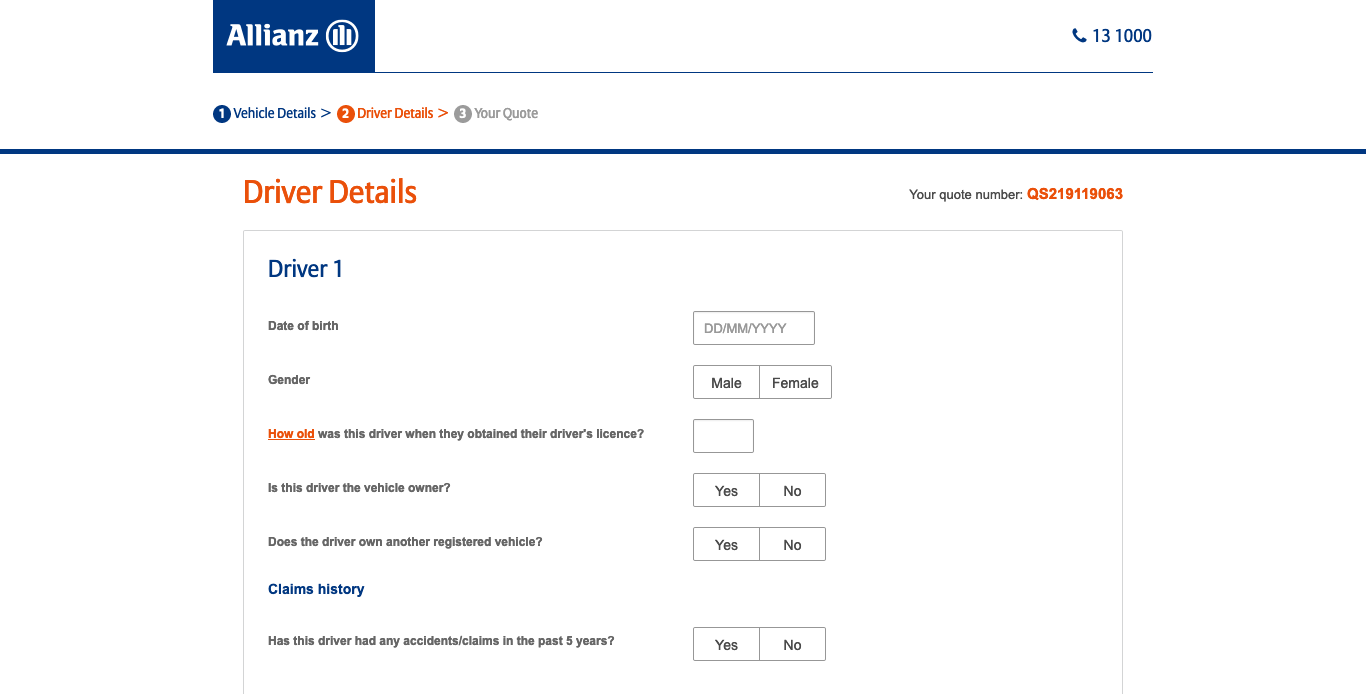

In [147]:
def next_page(driver): # next page
    next_page = driver.find_element_by_xpath("//input[@id='btnNext']")
    next_page.click()

next_page(driver)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

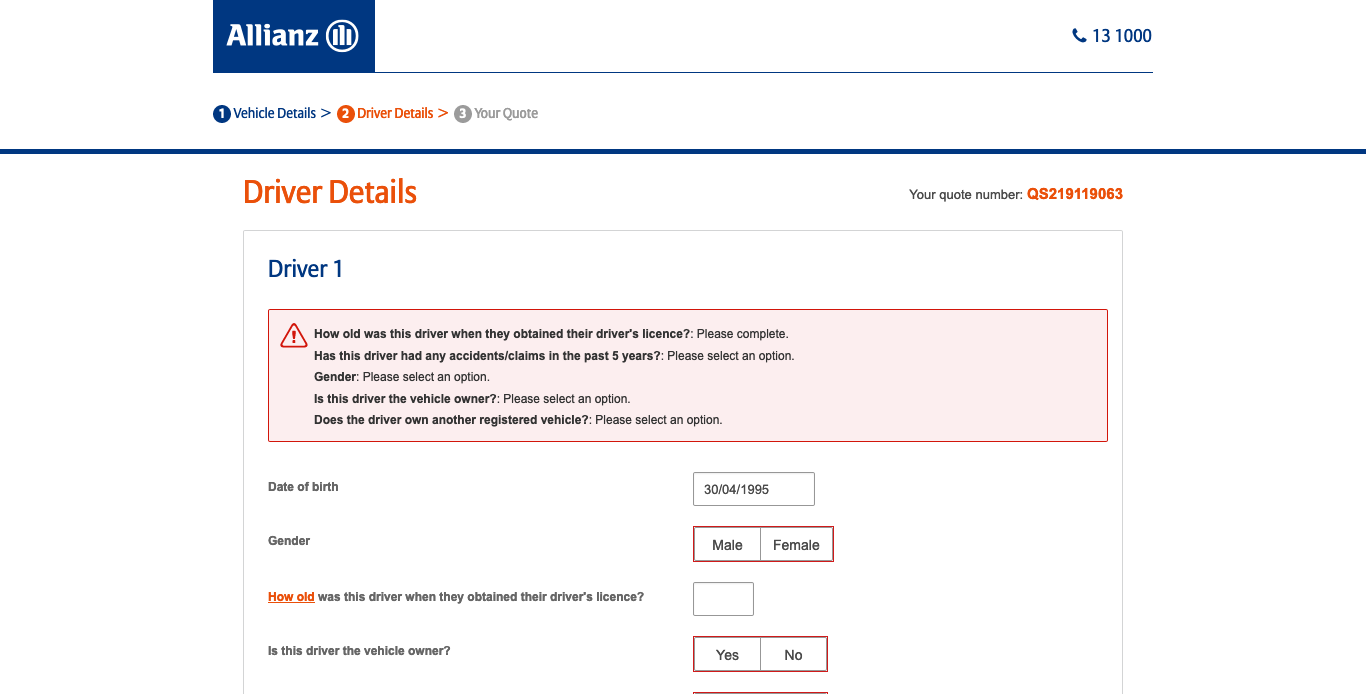

In [148]:
# driver
def driver_DOB(driver,DOB=30041995): # must enter
    driver_DOB = driver.find_element_by_xpath("//input[@id='d0DateOfBirth']")
    driver_DOB.send_keys(DOB,Keys.RETURN)
    
driver_DOB(driver,DOB=30041995)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

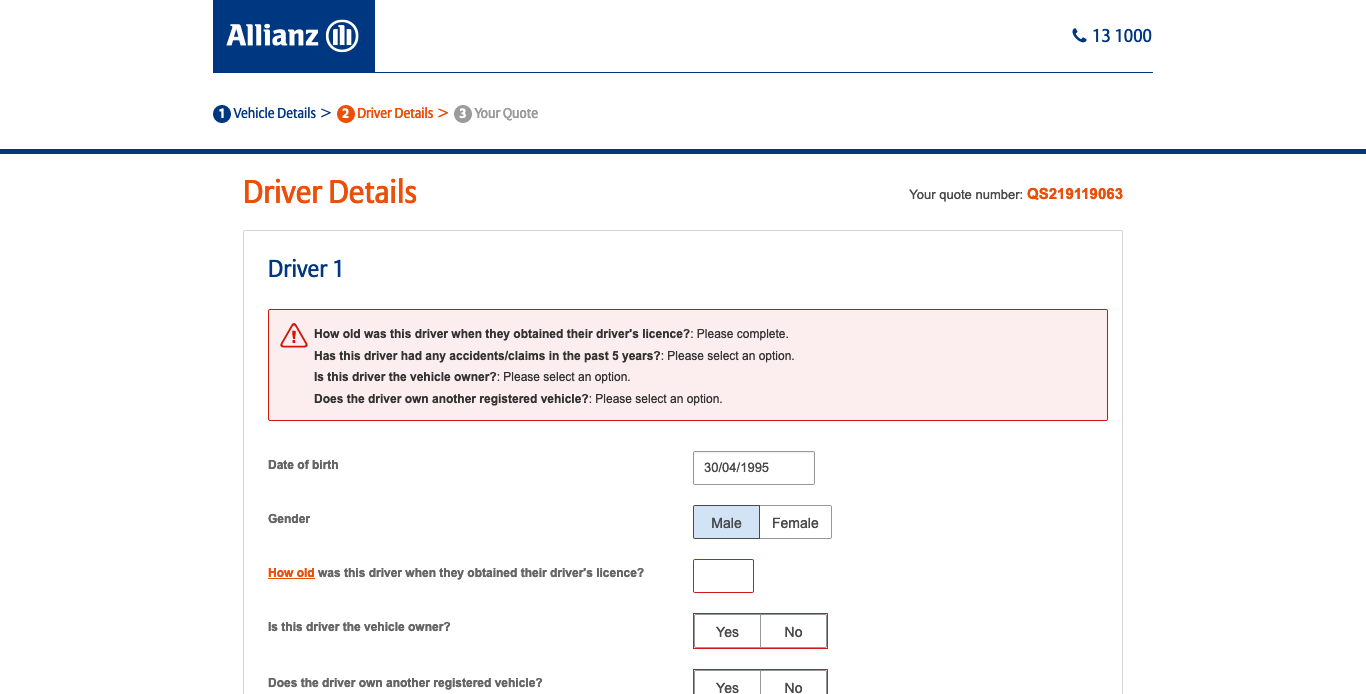

In [149]:
def driver_gender(driver,index="m"): # iterable (m,f)
    if index == "m":
        driver_gender = driver.find_element_by_xpath("//label[@id='labelGenderMale0']")
    elif index == "f":
        driver_gender = driver.find_element_by_xpath("//label[@id='labelGenderFemale0']")
    driver_gender.click()
    
driver_gender(driver,index="m")
driver.save_screenshot('quote.png')
Image.open('quote.png')  

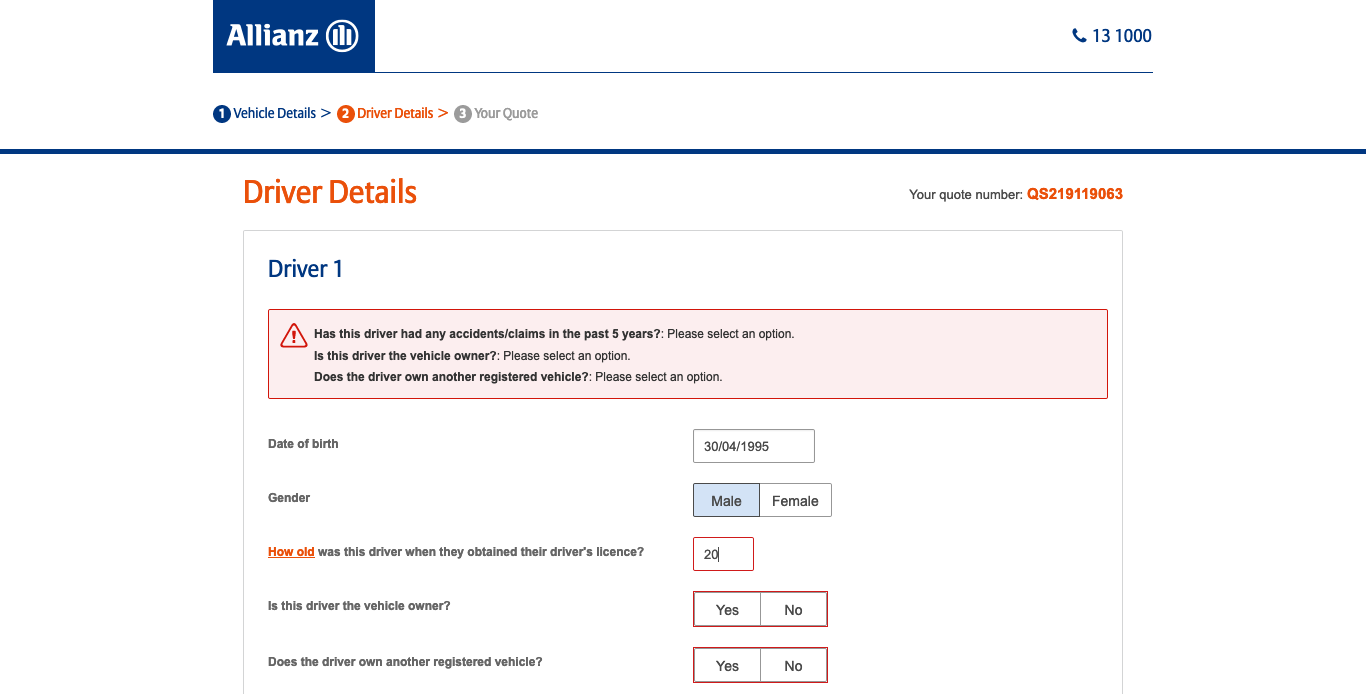

In [150]:
def driver_licence_age(driver,age=20): # must enter
    driver_licence_age = driver.find_element_by_xpath("//input[@id='ageLicenseObtained0']")
    driver_licence_age.send_keys(age)

driver_licence_age(driver,age=20)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

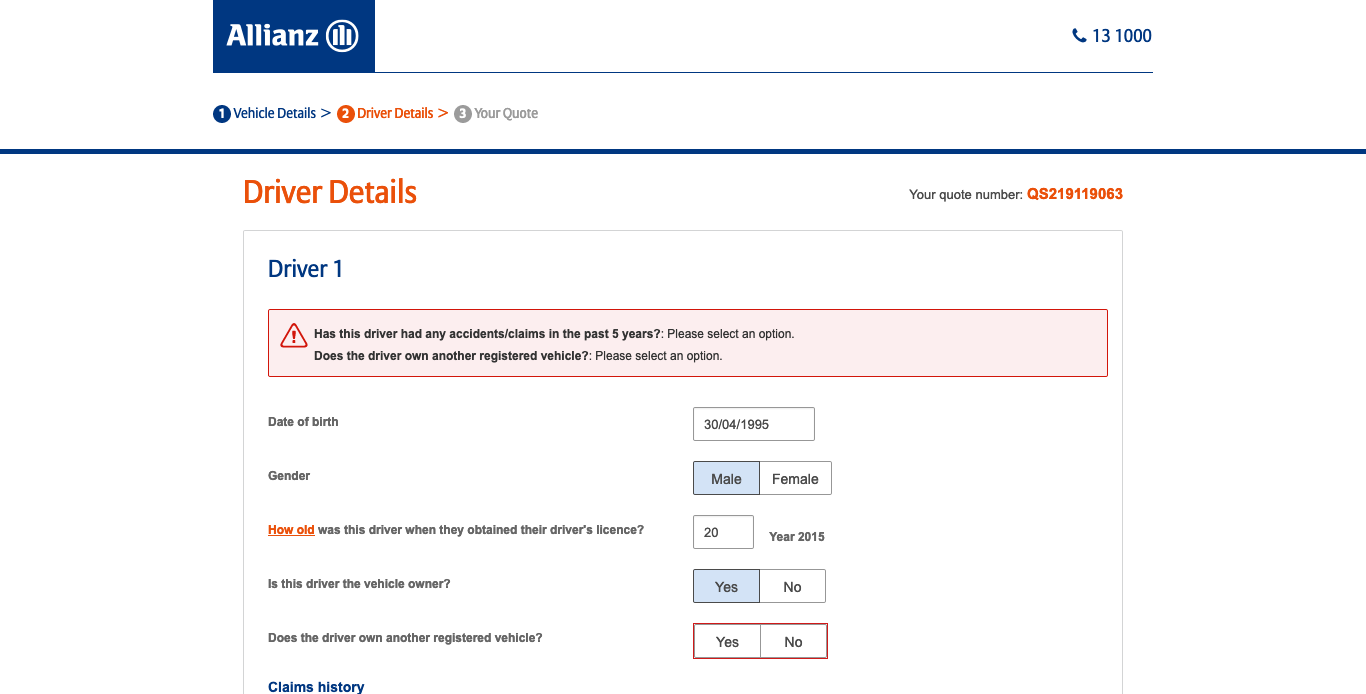

In [151]:
def driver_owner(driver,response="y"): # iterable (y,n)
    if response == "y":
        driver_onwer = driver.find_element_by_xpath("//label[@id='labelIsOwnerY0']")
    elif response == "n":
        driver_onwer = driver.find_element_by_xpath("//label[@id='labelIsOwnerN0']")
    driver_onwer.click()
    
driver_owner(driver,response="y")    
driver.save_screenshot('quote.png')
Image.open('quote.png')  


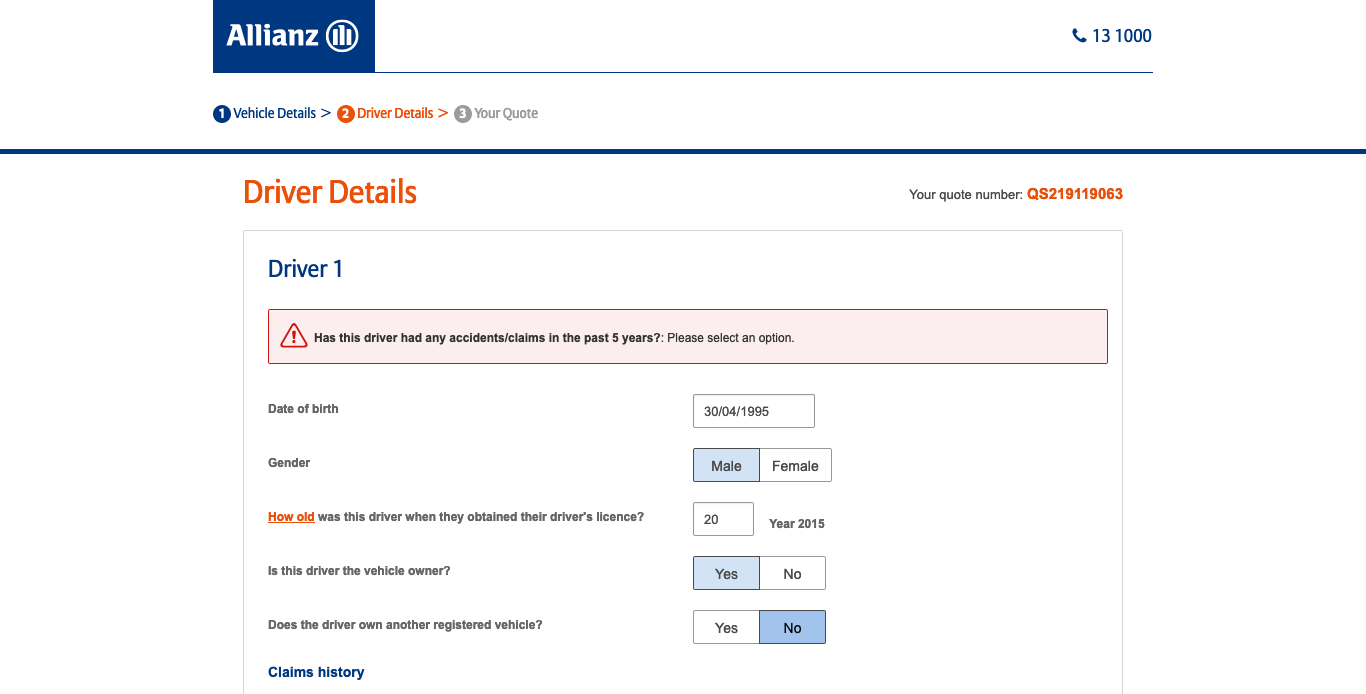

In [152]:
def other_car(driver,response="n"): # iterable (y,n)
    if response == "n":
        driver_other_cars = driver.find_element_by_xpath("//label[@id='labelOwnAnotherVehicleN0']")
    elif response == "y":
        driver_other_cars = driver.find_element_by_xpath("//label[@id='labelOwnAnotherVehicleY0']")
    driver_other_cars.click()
    
other_car(driver,response="n")
driver.save_screenshot('quote.png')
Image.open('quote.png')  

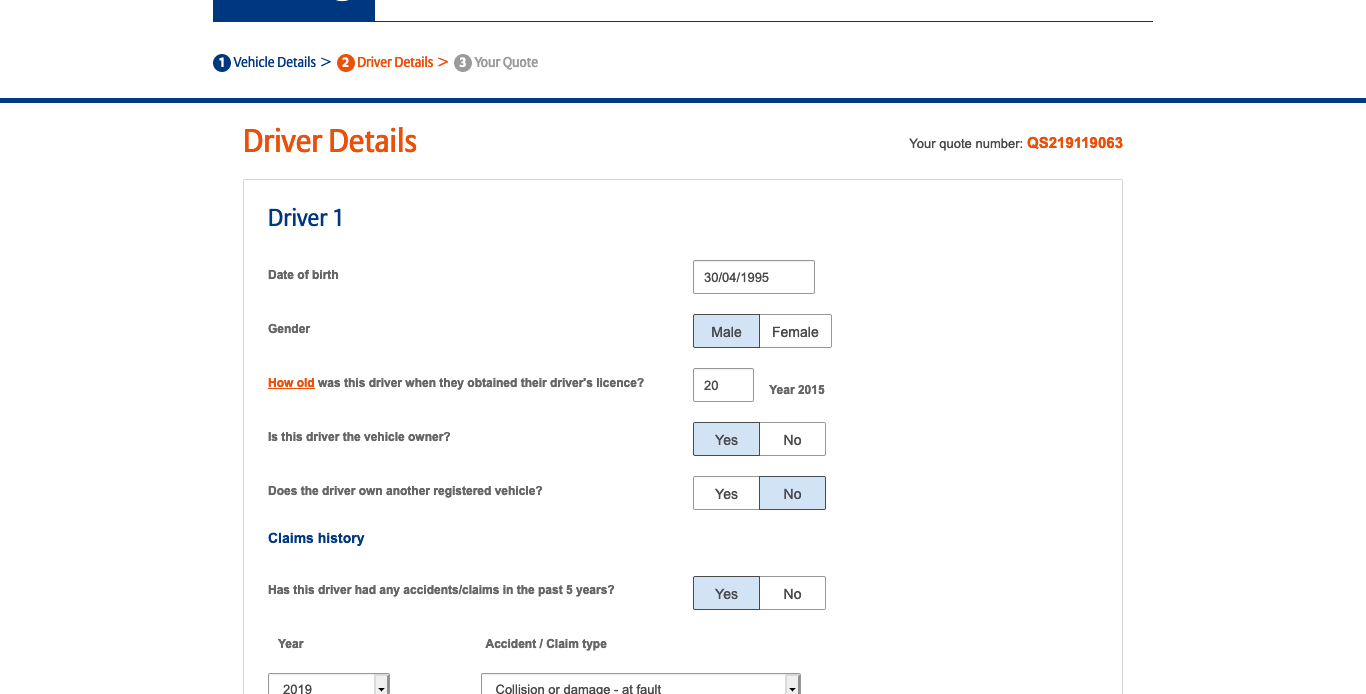

In [153]:
def claim_hist(driver,response="n",claim_year=None,claim_reason=None):
    if response == "n":
        driver.find_element_by_xpath("//label[@id='labelClaimsLast5YearsN0']").click()
    elif response == "y":
        driver.find_element_by_xpath("//label[@id='labelClaimsLast5YearsY0']").click()
        years = driver.find_element_by_xpath("//select[@id='dto.driverDetailsDTO[0].claimDTO[0].claimYear']")
        years_options = Select(years)
        years_options.select_by_index(claim_year-2018)
        reasons = driver.find_element_by_xpath("//select[@id='dto.driverDetailsDTO[0].claimDTO[0].claimCode']")
        reasons_options = Select(reasons)
        reasons_options.select_by_index(claim_reason)
        
claim_hist(driver,response="y",claim_year=2019,claim_reason=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

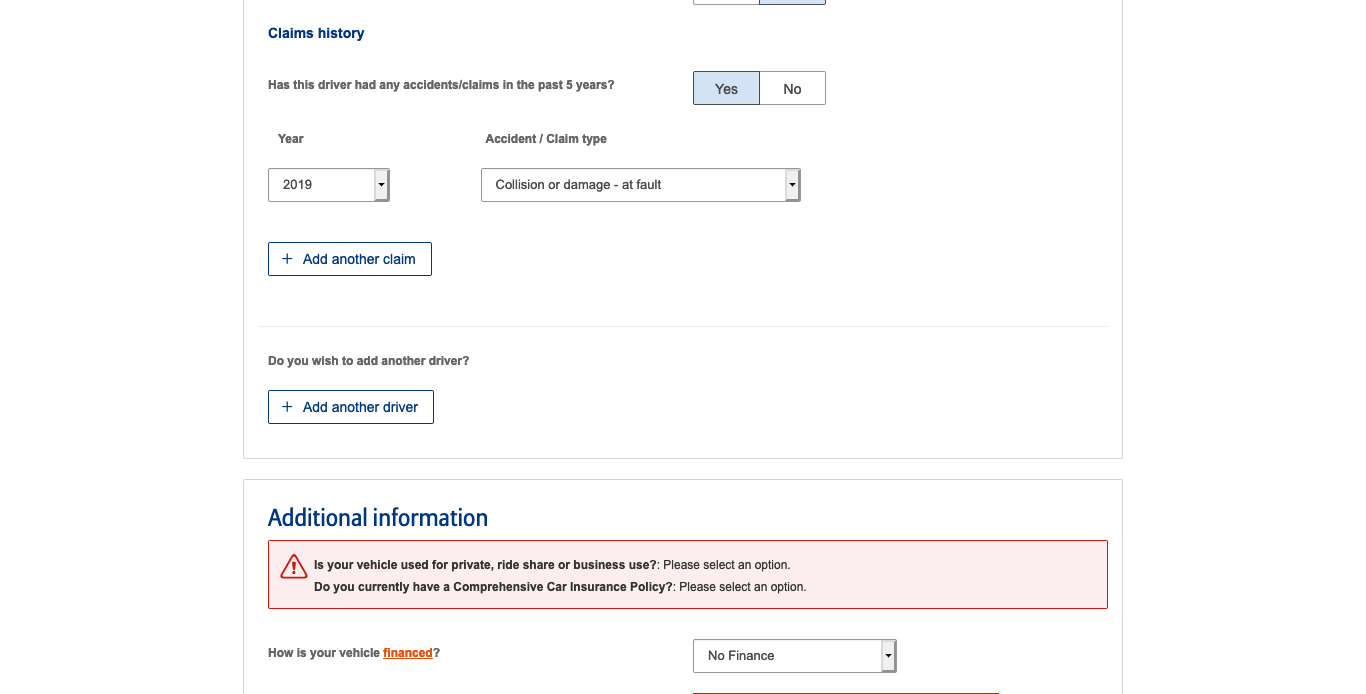

In [154]:
def finance(driver,index=1): # iterable
    finance = driver.find_element_by_xpath("//select[@id='financeCode']")
    finance_options = Select(finance)
    finance_options.select_by_index(index)
    
finance(driver,index=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')  

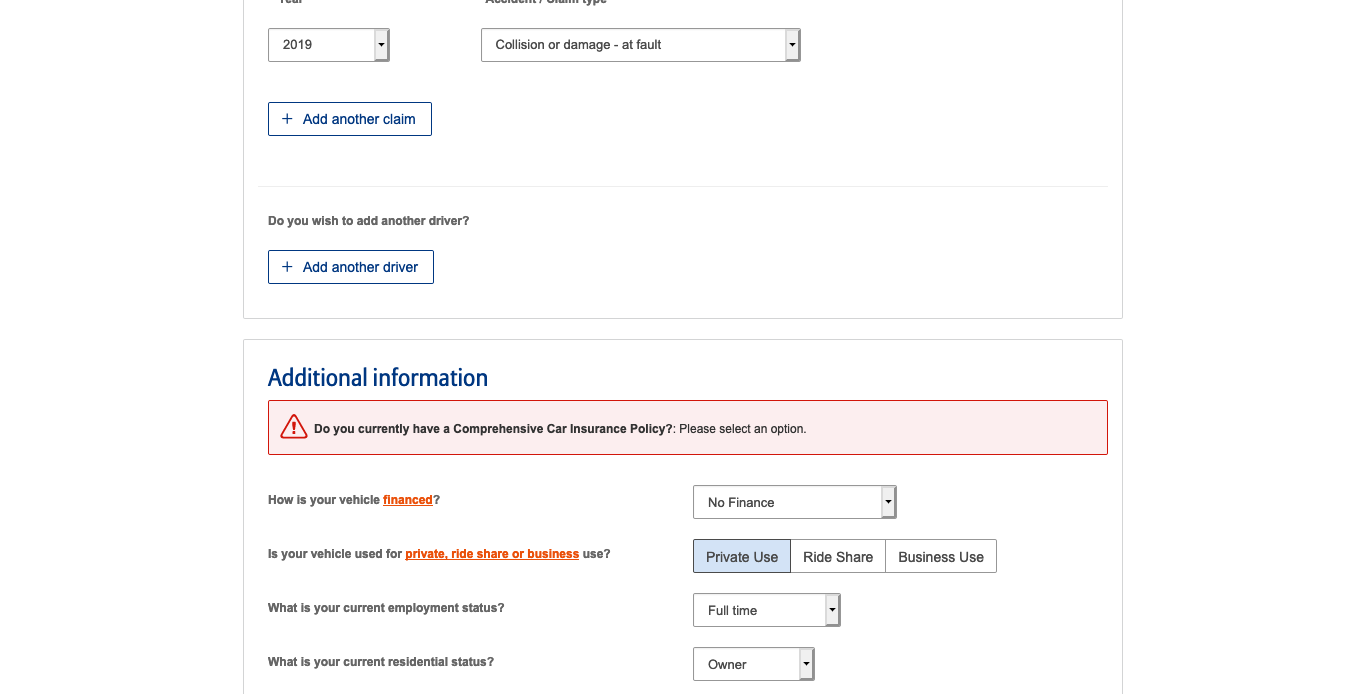

In [155]:
def car_use(driver,use="private",index_e=1,index_o=1,index_b=None): # iterable
    if use == "private":
        driver.find_element_by_xpath("//label[@id='labelVehicleUsageP']").click()
        employment = driver.find_element_by_xpath("//select[@id='employmentStatus']")
        employment_options = Select(employment)
        employment_options.select_by_index(index_e)
        occupancy = driver.find_element_by_xpath("//select[@id='occupancyStatus']")
        occupancy_options = Select(occupancy)
        occupancy_options.select_by_index(index_o)
    elif use == "ride":
        driver.find_element_by_xpath("//label[@id='labelVehicleUsageR']").click()
    elif use == "business":
        driver.find_element_by_xpath("//label[@id='labelVehicleUsageB']").click()
        business_use = driver.find_element_by_xpath("//select[@id='businessUseCode']")
        business_use_options = Select(business_use)
        business_use_options.select_by_index(index_b)

car_use(driver,use="private",index_e=1,index_o=1)
driver.save_screenshot('quote.png')
Image.open('quote.png')   
    

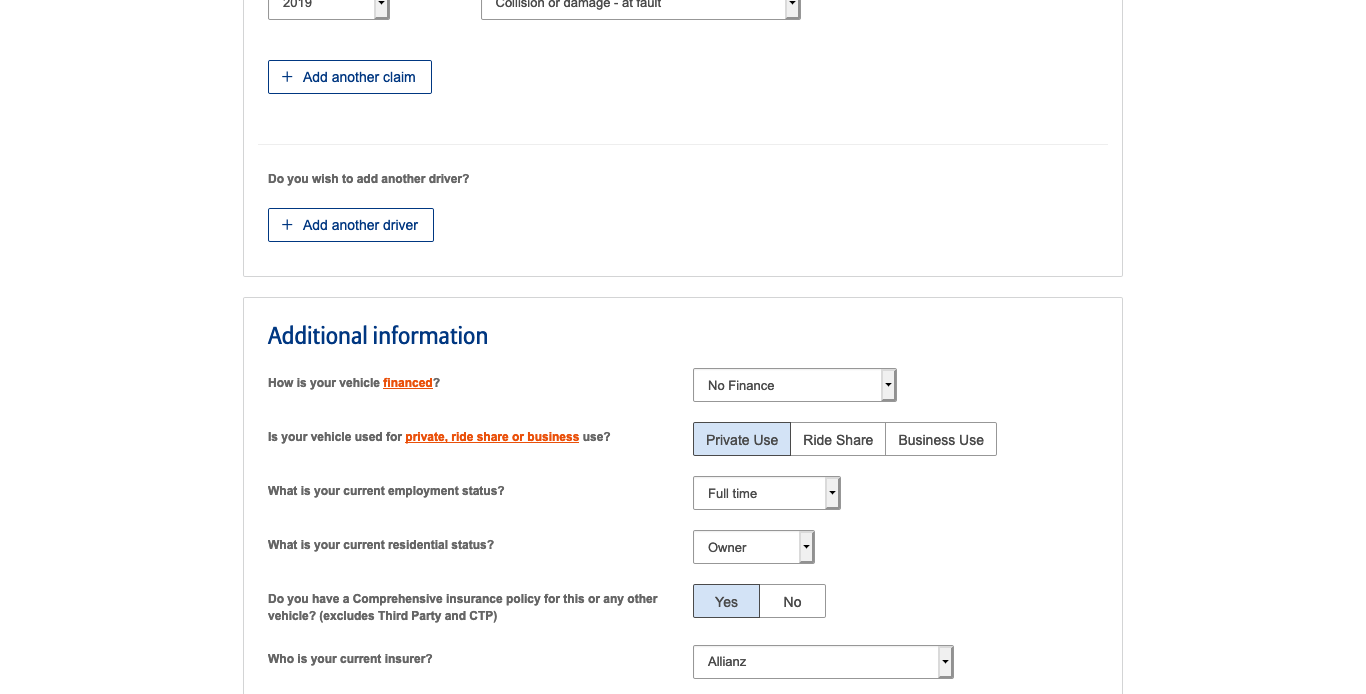

In [156]:
def other_ins(driver,response="n",index_ins=None):
    if response == "n":
        driver.find_element_by_xpath("//label[@id='labelCurrentInsuredNo']").click()
    elif response == "y":
        driver.find_element_by_xpath("//label[@id='labelCurrentInsuredYes']").click()
        current_ins = driver.find_element_by_xpath("//select[@id='currentInsurer']")
        current_ins_options = Select(current_ins)
        current_ins_options.select_by_index(index_ins)
        
other_ins(driver,response="y",index_ins=2)
driver.save_screenshot('quote.png')
Image.open('quote.png')  


$2,638.59 annual


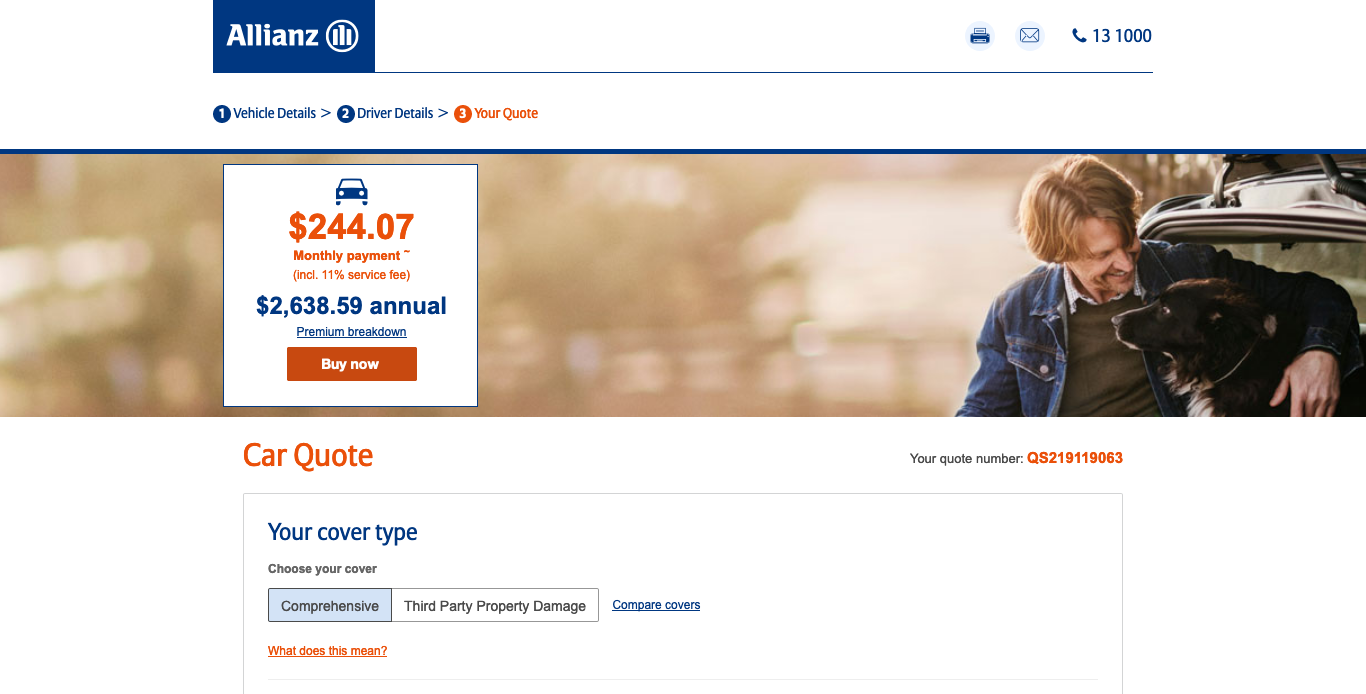

In [158]:
def submit(driver): # submit form 
    driver.find_element_by_xpath("//input[@id='dodAcknowledgedFlag']").click()
    driver.find_element_by_xpath("//input[@id='kfsAcknowledgedFlag']").click()
    driver.find_element_by_xpath("//input[@id='btnNext']").click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((
            By.XPATH, "//span[@class='annually']")))
    price_element = driver.find_element_by_xpath("//span[@class='annually']")
    price = price_element.text
    return price
    
price = submit(driver)
print(price)
driver.save_screenshot('quote.png')
Image.open('quote.png')      

$2,388.67 annual


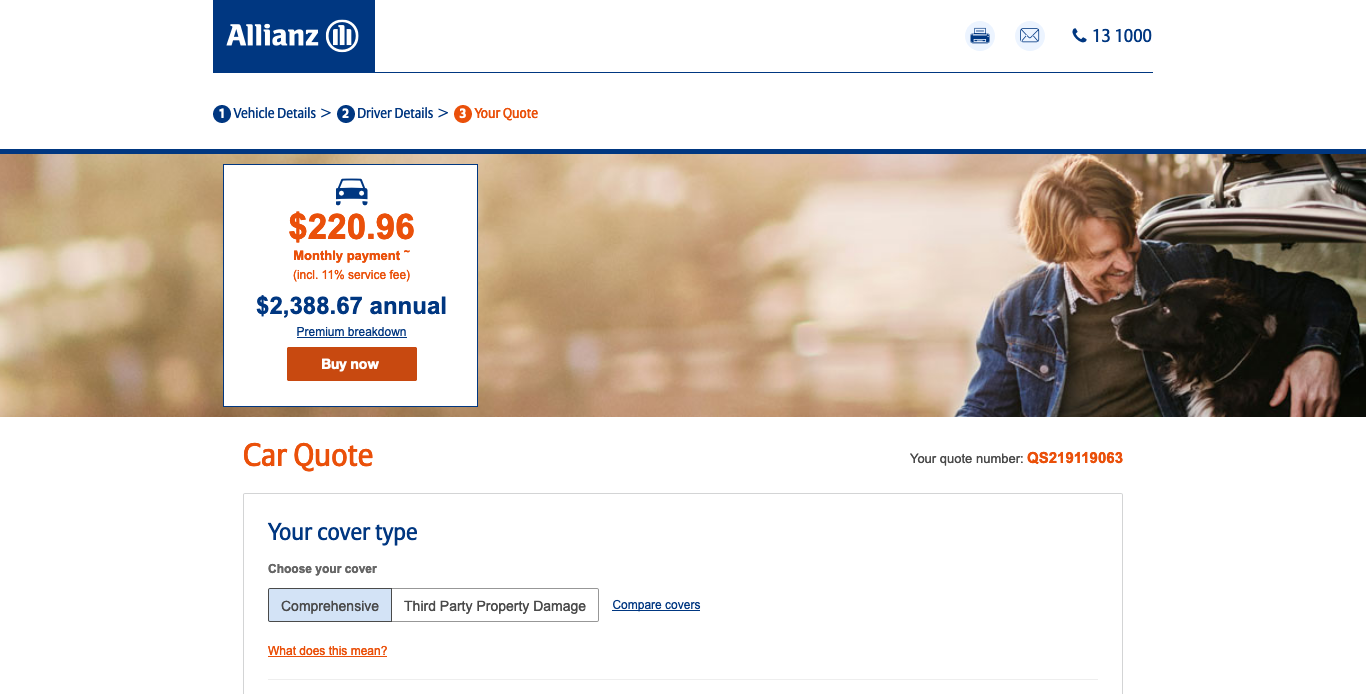

In [159]:
def get_quote(driver,name_dirver="y"): # generate quote
    if name_dirver == "y":
        driver.find_element_by_xpath("//input[@id='option-named-driver']").click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((
            By.XPATH, "//span[@class='annually']")))
    price_element = driver.find_element_by_xpath("//span[@class='annually']")
    price = price_element.text
    return price

price = get_quote(driver,name_dirver="y")
print(price)
driver.save_screenshot('quote.png')
Image.open('quote.png')     

In [160]:
driver.close()